In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df_salary = pd.read_csv("salary.csv").dropna()

df_salary = df_salary.drop(['degree','otherqual','position','male'], axis=1)\

df_salary.head()

,salary,exprior,yearsworked,yearsrank,market,Field,yearsabs
0,53000.0,0,0,0,1.17,3,0
1,58000.0,1,0,0,1.24,2,0
2,45500.0,0,0,0,1.21,3,2
3,35782.0,0,2,1,0.99,4,1
4,34731.0,0,2,2,0.91,4,1


In [3]:
#defining the y variable
y = df_salary.salary

#splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_salary, y, test_size=0.3, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(359, 7) (359,)
(154, 7) (154,)


## Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

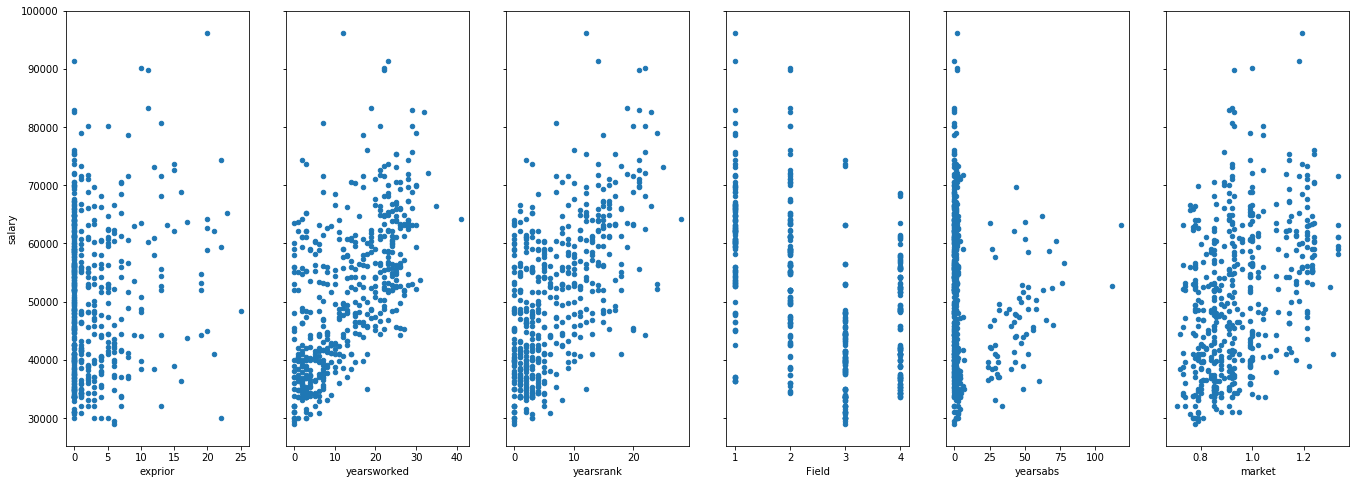

In [4]:
fig, axs = plt.subplots(1, 6, sharey=True)
df_salary.plot(kind='scatter', x='exprior', y='salary', ax=axs[0], figsize=(23, 8))
df_salary.plot(kind='scatter', x='yearsworked', y='salary', ax=axs[1])
df_salary.plot(kind='scatter', x='yearsrank', y='salary', ax=axs[2])
df_salary.plot(kind='scatter', x='Field', y='salary', ax=axs[3])
df_salary.plot(kind='scatter', x='yearsabs', y='salary', ax=axs[4])
df_salary.plot(kind='scatter', x='market', y='salary', ax=axs[5])

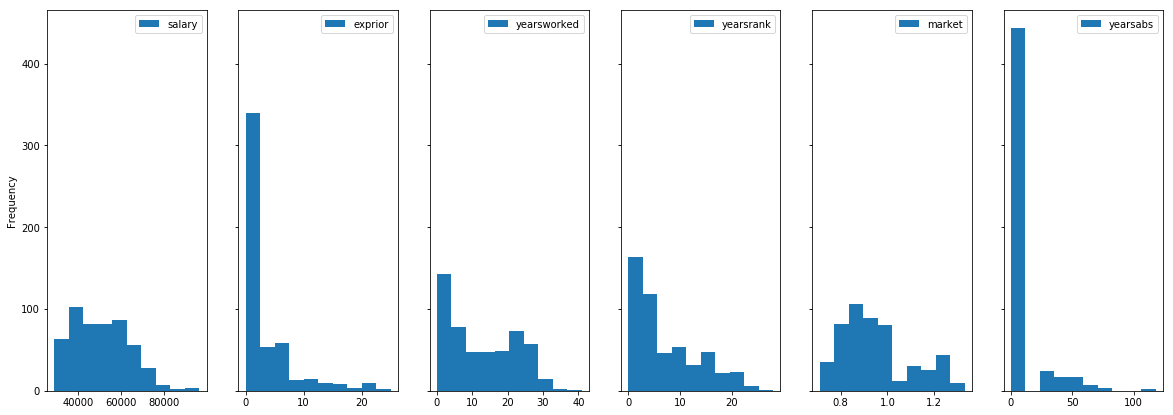

In [5]:
fig, axs = plt.subplots(1, 6, sharey=True)
df_salary.plot(kind='hist', y='salary', ax=axs[0], figsize=(20, 7))
df_salary.plot(kind='hist', y='exprior', ax=axs[1])
df_salary.plot(kind='hist', y='yearsworked', ax=axs[2])
df_salary.plot(kind='hist', y='yearsrank', ax=axs[3])
df_salary.plot(kind='hist', y='market', ax=axs[4])
df_salary.plot(kind='hist', y='yearsabs', ax=axs[5])

In [6]:
# Statistic summary table
x_train.describe()

,salary,exprior,yearsworked,yearsrank,market,Field,yearsabs
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,50621.754733,3.030641,12.838440,6.988858,0.945014,2.529248,7.206128
std,12695.639676,5.021925,9.438811,6.395694,0.146176,1.112954,16.778773
min,29000.000000,0.000000,0.000000,0.000000,0.710000,1.000000,0.000000
25%,39993.000000,0.000000,4.000000,2.000000,0.845000,2.000000,0.000000
50%,49357.000000,1.000000,11.000000,5.000000,0.920000,3.000000,1.000000
75%,60171.500000,4.000000,21.500000,11.500000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,4.000000,118.000000


### One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [7]:
xg = x_train['Field']
pd.get_dummies(xg).head()

,1,2,3,4
141,1,0,0,0
419,0,1,0,0
135,1,0,0,0
386,0,0,1,0
122,0,1,0,0


### Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

In [8]:
x_train.corr()

,salary,exprior,yearsworked,yearsrank,market,Field,yearsabs
salary,1.000000,0.101222,0.617879,0.587081,0.410094,-0.507539,-0.090337
exprior,0.101222,1.000000,-0.286998,-0.107656,-0.030270,-0.055385,0.116050
yearsworked,0.617879,-0.286998,1.000000,0.807174,-0.044923,-0.276619,0.037338
yearsrank,0.587081,-0.107656,0.807174,1.000000,-0.027099,-0.287598,0.074206
market,0.410094,-0.030270,-0.044923,-0.027099,1.000000,-0.213808,-0.174091
Field,-0.507539,-0.055385,-0.276619,-0.287598,-0.213808,1.000000,-0.001969
yearsabs,-0.090337,0.116050,0.037338,0.074206,-0.174091,-0.001969,1.000000


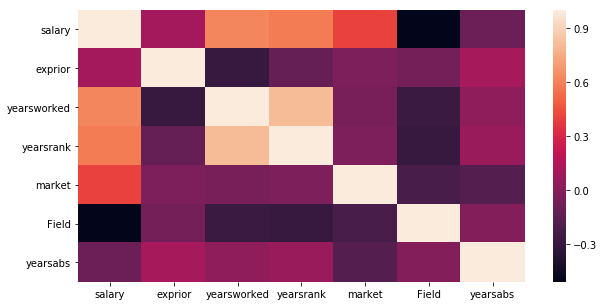

In [9]:
plt.figure(figsize=(10,5))
           
sns.heatmap(x_train.corr())

### Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [10]:
#created a fitted model in one line
l_model = smf.ols(formula='salary ~ exprior + yearsworked + yearsrank + market + Field + yearsabs', data=x_train).fit()

#print the coefficients
print(l_model.params)
#print(l_model.summary())

Intercept      12228.738738
exprior          723.587362
yearsworked      765.919272
yearsrank        222.153384
market         33466.535359
Field          -2506.906084
yearsabs         -65.427598
dtype: float64


### Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

In [11]:
predictions = l_model.predict()
residuals = l_model.resid
print('predictions:', predictions.shape,'\nresiduals:', residuals.shape)

predictions: (359,) 
residuals: (359,)


### Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

## Run your model on the test set.

In [12]:
#created a fitted model in one line
l_model = smf.ols(formula='salary ~ exprior + yearsworked + yearsrank + market + Field + yearsabs', data=x_test).fit()

#print the coefficients
print(l_model.params)
#print(l_model.summary())

Intercept      10278.020136
exprior          801.267537
yearsworked      737.832536
yearsrank        312.038260
market         34609.169687
Field          -2226.236604
yearsabs         -35.437780
dtype: float64


### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

In [13]:
from sklearn import metrics
prediction = l_model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, prediction)))

prediction1 = l_model.predict(x_train)
print(np.sqrt(metrics.mean_squared_error(y_train, prediction1)))

5975.7832677591505
6733.171410695806
